In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import re
import datetime
import seaborn as sns
import plotly.express as px

In [3]:
starbucks_df = pd.read_csv('Data/Cleaning_data/starbucksvietnam_cleaning_data.csv')
highlands_df = pd.read_csv('Data/Cleaning_data/higlandscoffeevietnam_cleaning_data.csv')
coffee_house_df = pd.read_csv('Data/Cleaning_data/The.Coffee.House.2014_cleaning_data.csv')
starbucks_df.name = 'starbucks'
highlands_df.name = 'highlands'
coffee_house_df.name = 'coffee_house'

In [4]:
starbucks_df['time'] = pd.to_datetime(starbucks_df['time'])
highlands_df['time'] = pd.to_datetime(highlands_df['time'])
coffee_house_df['time'] = pd.to_datetime(coffee_house_df['time'])

In [5]:
starbucks_df

,post_id,text,post_text,shared_text,time,timestamp,image,image_lowquality,images,images_description,...,available,comments_full,reactors,w3_fb_url,reaction_count,page_id,image_id,image_ids,was_live,fetched_time
0,726645836163214,"KNOCK KNOCK, CÙNG STARBUCKS KHÁM PHÁ HƯƠNG VỊ ...","KNOCK KNOCK, CÙNG STARBUCKS KHÁM PHÁ HƯƠNG VỊ ...",no text,2023-11-21 13:00:37,1700571637,https://m.facebook.com/photo/view_full_size/?f...,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,['https://m.facebook.com/photo/view_full_size/...,['May be an image of 10 people and text'],...,True,"[{'comment_id': '1001878300879897', 'comment_u...",[],https://www.facebook.com/starbucksvietnam/post...,257,518824771491353,7.266458e+14,['726645812829883'],False,2023-11-22 05:00:55.659660
1,726388922855572,Trở lại và mang theo câu chuyện cà phê đầy sự ...,Trở lại và mang theo câu chuyện cà phê đầy sự ...,no text,2023-11-21 02:58:53,1700535533,NaN,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,[],[],...,True,[],[],https://www.facebook.com/starbucksvietnam/post...,64,518824771491353,7.263873e+14,['726387309522400'],False,2023-11-22 05:00:57.094580
2,726070859554045,"XIN CHÀO TUẦN MỚI, STARBUCKS GỬI TỚI BẠN COMBO...","XIN CHÀO TUẦN MỚI, STARBUCKS GỬI TỚI BẠN COMBO...",no text,2023-11-20 13:01:14,1700485274,NaN,https://scontent-iad3-2.xx.fbcdn.net/v/t15.525...,[],[],...,True,"[{'comment_id': '1034724710985815', 'comment_u...",[],https://www.facebook.com/starbucksvietnam/post...,310,518824771491353,NaN,[],False,2023-11-22 05:00:59.827016
3,725322132962251,"MUA DOLCE MISTO, NHẬN NGAY LY REUSABLE PHIÊN B...","MUA DOLCE MISTO, NHẬN NGAY LY REUSABLE PHIÊN B...",no text,2023-11-19 11:00:24,1700391624,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,['https://scontent-iad3-2.xx.fbcdn.net/v/t39.3...,"['Có thể là hình ảnh về văn bản', ""Có thể là h...",...,True,"[{'comment_id': '1182624172694829', 'comment_u...",[],https://www.facebook.com/starbucksvietnam/post...,1202,518824771491353,NaN,[],False,2023-11-22 05:01:07.049403
4,724705903023874,"GỬI CHÚT NGỌT NGÀO, AIRDROP CHÚT “DEAL” THƯƠNG...","GỬI CHÚT NGỌT NGÀO, AIRDROP CHÚT “DEAL” THƯƠNG...",no text,2023-11-18 07:00:31,1700290831,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,['https://scontent-iad3-2.xx.fbcdn.net/v/t39.3...,"[""Có thể là hình ảnh về 2 người, đồ uống và vă...",...,True,"[{'comment_id': '3586680234981454', 'comment_u...",[],https://www.facebook.com/starbucksvietnam/post...,651,518824771491353,5.188248e+14,['518824771491353'],False,2023-11-22 05:01:28.878784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,669928315168300,Bạn sẽ chọn cửa hàng Starbucks nào để HẸN HÒ c...,Bạn sẽ chọn cửa hàng Starbucks nào để HẸN HÒ c...,no text,2023-08-19 02:00:02,1692410402,https://scontent-sea1-1.xx.fbcdn.net/v/t39.308...,https://scontent-sea1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-sea1-1.xx.fbcdn.net/v/t39.3...,"['Có thể là hình ảnh về 1 người, đồ uống và vă...",...,True,"[{'comment_id': '224129570235864', 'comment_ur...","[{'name': 'Cookies Lê', 'link': 'https://faceb...",https://www.facebook.com/starbucksvietnam/post...,520,518824771491353,NaN,[],False,2023-11-14 03:16:59.314890
96,669471165214015,Simple but #Essential 🍀\n\nBộ sưu tập New Core...,Simple but #Essential 🍀\n\nBộ sưu tập New Core...,no text,2023-08-18 10:01:59,1692352919,https://scontent-sea1-1.xx.fbcdn.net/v/t39.308...,https://scontent-sea1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-sea1-1.xx.fbcdn.net/v/t39.3...,"['Không có mô tả ảnh.', 'Không có mô tả ảnh.',...",...,True,"[{'comment_id': '3506318829686227', 'comment_u...","[{'name': 'Haw Kaylin', 'link': 'https://faceb...",https://www.facebook.com/starbucksvietnam/post...,1406,518824771491353,NaN,[],False,2023-11-14 03:17:26.996829
97,668561831971615,#Iced_Americano\nAn ideal choice for a fresh m...,#Iced_Americano\nAn ideal choice for a fresh m.

In [6]:
highlands_df

,post_id,text,post_text,shared_text,time,timestamp,image,image_lowquality,images,images_description,...,comments_full,reactors,w3_fb_url,reaction_count,with,page_id,image_id,image_ids,was_live,fetched_time
0,738126251673720,"THẺ XINH TRI ÂN, CẢM ƠN NHỮNG ÂN CẦN\n\nThanh ...","THẺ XINH TRI ÂN, CẢM ƠN NHỮNG ÂN CẦN\n\nThanh ...",no text,2023-11-20 07:43:16,1700466196,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,['https://scontent-iad3-2.xx.fbcdn.net/v/t39.3...,['Có thể là hình ảnh về văn bản'],...,"[{'comment_id': '677323951047629', 'comment_ur...",[],https://www.facebook.com/highlandscoffeevietna...,1143,no with,181603421920510,7.381254e+14,['738125391673806'],False,2023-11-21 15:47:10.467603
1,738036051682740,CÙNG CỠ CÙNG DÒNG - MUA 1 TẶNG 1 ❤\n❤ CÙNG HIG...,CÙNG CỠ CÙNG DÒNG - MUA 1 TẶNG 1 ❤\n❤ CÙNG HIG...,no text,2023-11-20 03:30:53,1700451053,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...,"[""Có thể là hình ảnh về đồ uống và văn bản cho...",...,"[{'comment_id': '882163550010907', 'comment_ur...","[{'name': 'Duc Cam Quyt', 'link': 'https://fac...",https://www.facebook.com/highlandscoffeevietna...,3600,no with,181603421920510,7.380341e+14,['738034131682932'],False,2023-11-21 15:47:25.867764
2,737983141688031,Ăn quả nhớ kẻ trồng cây\nOrder ☕️ nhớ Phin Tru...,Ăn quả nhớ kẻ trồng cây\nOrder ☕️ nhớ Phin Tru...,no text,2023-11-20 01:00:27,1700442027,NaN,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,[],[],...,"[{'comment_id': '2033860803651477', 'comment_u...","[{'name': 'Sơn Quang', 'link': 'https://facebo...",https://www.facebook.com/highlandscoffeevietna...,658,no with,181603421920510,NaN,[],False,2023-11-21 15:48:12.461375
3,737463048406707,MUA 3 KHAO 1 - MUA 5 KHAO 3\nGỌI 19001755 - HI...,MUA 3 KHAO 1 - MUA 5 KHAO 3\nGỌI 19001755 - HI...,no text,2023-11-19 05:00:10,1700370010,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,['https://scontent-iad3-2.xx.fbcdn.net/v/t39.3...,"[""Có thể là hình ảnh về văn bản cho biết 'NGHL...",...,"[{'comment_id': '583508203900097', 'comment_ur...","[{'name': 'Đỗ Lài', 'link': 'https://facebook....",https://www.facebook.com/highlandscoffeevietna...,1316,no with,181603421920510,7.374630e+14,['737463031740042'],False,2023-11-21 15:48:23.294415
4,737360275083651,"Hé series 03: Khi bình minh hé rạng, Chúng mìn...","Hé series 03: Khi bình minh hé rạng, Chúng mìn...",no text,2023-11-19 01:00:02,1700355602,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,['https://scontent-iad3-2.xx.fbcdn.net/v/t39.3...,"[""Có thể là hình ảnh về 5 người và văn bản cho...",...,"[{'comment_id': '728204355876119', 'comment_ur...","[{'name': 'Kim Cuong', 'link': 'https://facebo...",https://www.facebook.com/highlandscoffeevietna...,2667,no with,181603421920510,NaN,[],False,2023-11-21 15:49:00.325370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6736978539716266,SIÊU PHẨM LY HỒNG QUAY TRỞ LẠI!!!\nĐỘC QUYỀN T...,SIÊU PHẨM LY HỒNG QUAY TRỞ LẠI!!!\nĐỘC QUYỀN T...,no text,2023-08-29 11:00:03,1693306803,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,['https://scontent-iad3-2.xx.fbcdn.net/v/t39.3...,"[""Có thể là hình ảnh về \u200evăn bản cho biết...",...,"[{'comment_id': '3106807869626686', 'comment_u...",[],https://www.facebook.com/highlandscoffeevietna...,2610,no with,181603421920510,6.736978e+15,['6736978493049604'],False,2023-11-21 16:22:40.980521
96,6736606383086815,Sống trên đời đừng hiền quá… Cái gì không phải...,Sống trên đời đừng hiền quá… Cái gì không phải...,no text,2023-08-29 08:12:24,1693296744,NaN,https://scontent-iad3-2.xx.fbcdn.net/m1/v/t6/A...,[],[],...,"[{'comment_id': '1548827349188165', 'comment_u...",[],https://www.facebook.com/highlandscoffeevietna...,16

In [7]:
coffee_house_df

,post_id,text,post_text,shared_text,time,timestamp,image,image_lowquality,images,images_description,...,comments_full,reactors,w3_fb_url,reaction_count,with,page_id,image_id,image_ids,was_live,fetched_time
0,360456836345433,BẢN TIN ĐẦU TUẦN: TOP 1 TRENDING THE MOCHI SHO...,BẢN TIN ĐẦU TUẦN: TOP 1 TRENDING THE MOCHI SHO...,no text,2023-11-21 13:00:04,1700571604,https://scontent-lga3-2.xx.fbcdn.net/v/t39.308...,https://scontent-lga3-2.xx.fbcdn.net/v/t39.308...,['https://scontent-lga3-2.xx.fbcdn.net/v/t39.3...,"[""Có thể là hình ảnh về đồ uống, kem gelato và...",...,[],[],https://www.facebook.com/The.Coffee.House.2014...,33,no with,1449657571974931,3.604560e+14,['360456033012180'],False,2023-11-21 18:10:57.247150
1,360368816354235,"NHÀ TUNG DEAL XỊN, CHỈ 9 BEAN\n\n✨ Khắp nơi rộ...","NHÀ TUNG DEAL XỊN, CHỈ 9 BEAN\n\n✨ Khắp nơi rộ...",no text,2023-11-21 01:00:04,1700528404,https://scontent-lga3-1.xx.fbcdn.net/v/t39.308...,https://scontent-lga3-1.xx.fbcdn.net/v/t39.308...,['https://scontent-lga3-1.xx.fbcdn.net/v/t39.3...,"[""Có thể là hình ảnh về văn bản cho biết 'CHI ...",...,"[{'comment_id': '692821826151674', 'comment_ur...",[],https://www.facebook.com/The.Coffee.House.2014...,77,no with,1449657571974931,NaN,[],False,2023-11-21 18:11:02.158200
2,358575226533594,"MINIGAME: GỬI LỜI CẢM ƠN “IDOL”, NHẬN QUÀ AI C...","MINIGAME: GỬI LỜI CẢM ƠN “IDOL”, NHẬN QUÀ AI C...",no text,2023-11-18 01:00:06,1700269206,NaN,https://scontent-lga3-1.xx.fbcdn.net/v/t39.308...,[],[],...,"[{'comment_id': '693116352765590', 'comment_ur...","[{'name': 'Bao Tran Quoc', 'link': 'https://fa...",https://www.facebook.com/The.Coffee.House.2014...,60,no with,1449657571974931,3.585749e+14,['358574866533630'],False,2023-11-21 18:11:04.646473
3,358605396530577,4 KIỂU FAN KHI “THƯỞNG THỨC” THE MOCHI SHOW\n\...,4 KIỂU FAN KHI “THƯỞNG THỨC” THE MOCHI SHOW\n\...,"4 KIỂU FAN KHI ""THƯỞNG THỨC"" THE MOCHI SHOW",2023-11-17 13:00:25,1700226025,NaN,https://scontent-lga3-2.xx.fbcdn.net/v/t15.525...,[],[],...,"[{'comment_id': '1068767297894426', 'comment_u...","[{'name': 'Nguyễn Ngọc Huyền', 'link': 'https:...",https://www.facebook.com/The.Coffee.House.2014...,122,no with,1449657571974931,NaN,[],False,2023-11-21 18:11:10.937487
4,358112739913176,"NGÀY TƯƠI TỈNH, CÓ NGAY BÁNH NƯỚC NHÀ\n\nBạn m...","NGÀY TƯƠI TỈNH, CÓ NGAY BÁNH NƯỚC NHÀ\n\nBạn m...",no text,2023-11-17 01:00:11,1700182811,https://scontent-lga3-1.xx.fbcdn.net/v/t39.308...,https://scontent-lga3-1.xx.fbcdn.net/v/t39.308...,['https://scontent-lga3-1.xx.fbcdn.net/v/t39.3...,"[""Có thể là hình ảnh về 1 người và văn bản cho...",...,"[{'comment_id': '303691915961424', 'comment_ur...","[{'name': 'Bao Tran Quoc', 'link': 'https://fa...",https://www.facebook.com/The.Coffee.House.2014...,97,no with,1449657571974931,NaN,[],False,2023-11-21 18:11:22.433214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3600836620190338,CHỐT ĐƠN NHÀ - ĐỔI QUÀ CHUẨN GU\n\nĐường đua “...,CHỐT ĐƠN NHÀ - ĐỔI QUÀ CHUẨN GU\n\nĐường đua “...,no text,2023-08-06 03:00:03,1691290803,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,['https://scontent-iad3-2.xx.fbcdn.net/v/t39.3...,['Không có mô tả ảnh.'],...,"[{'comment_id': '1565648354260535', 'comment_u...","[{'name': 'The Coffee House', 'link': 'https:/...",https://www.facebook.com/The.Coffee.House.2014...,81,no with,1449657571974931,3.600837e+15,['3600836590190341'],False,2023-11-21 18:26:07.669680
96,3599774180296582,"Trà Xanh Tây Bắc vị mộc dễ uống, dễ yêu nay cò...","Trà Xanh Tây Bắc vị mộc dễ uống, dễ yêu nay cò...",no text,2023-08-04 13:00:06,1691154006,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...,"['Không có mô tả ảnh.', 'Không có mô tả ảnh.',...",...,"[{'comment_id': '248379188084971', 'comment_ur...","[{'name': 'L.T.Em Tuấn Beo', 'link': 'https://...",https://www.facebook.com/The.Coffee.House.201

### Tần suất đăng bài của các page

#### a, Tần suất đăng bài trong từng ngày

In [45]:
def post_frequency_by_day(df):
    df['time'] = pd.to_datetime(df['time'])
    df['day'] = df['time'].dt.date
    post_frequency_df = df.groupby('day')['post_id'].count().reset_index()
    post_frequency_df.columns = ['day', 'post_count']
    post_frequency_df
    plt.figure(figsize=(20, 6))
    plt.plot(post_frequency_df['day'], post_frequency_df['post_count'], marker='o', linestyle='-')
    plt.xlabel('Time')
    plt.ylabel('Number of post')
    plt.title('Post frequency by day of '+ df.name)
    plt.show()

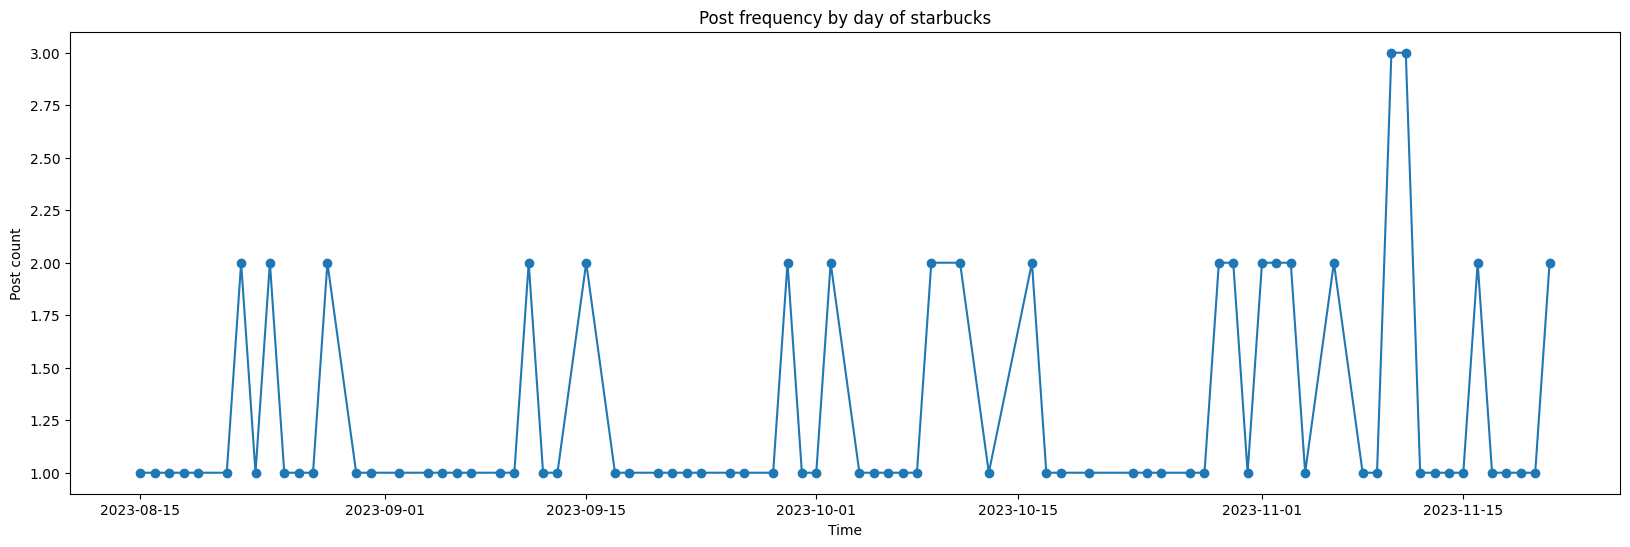

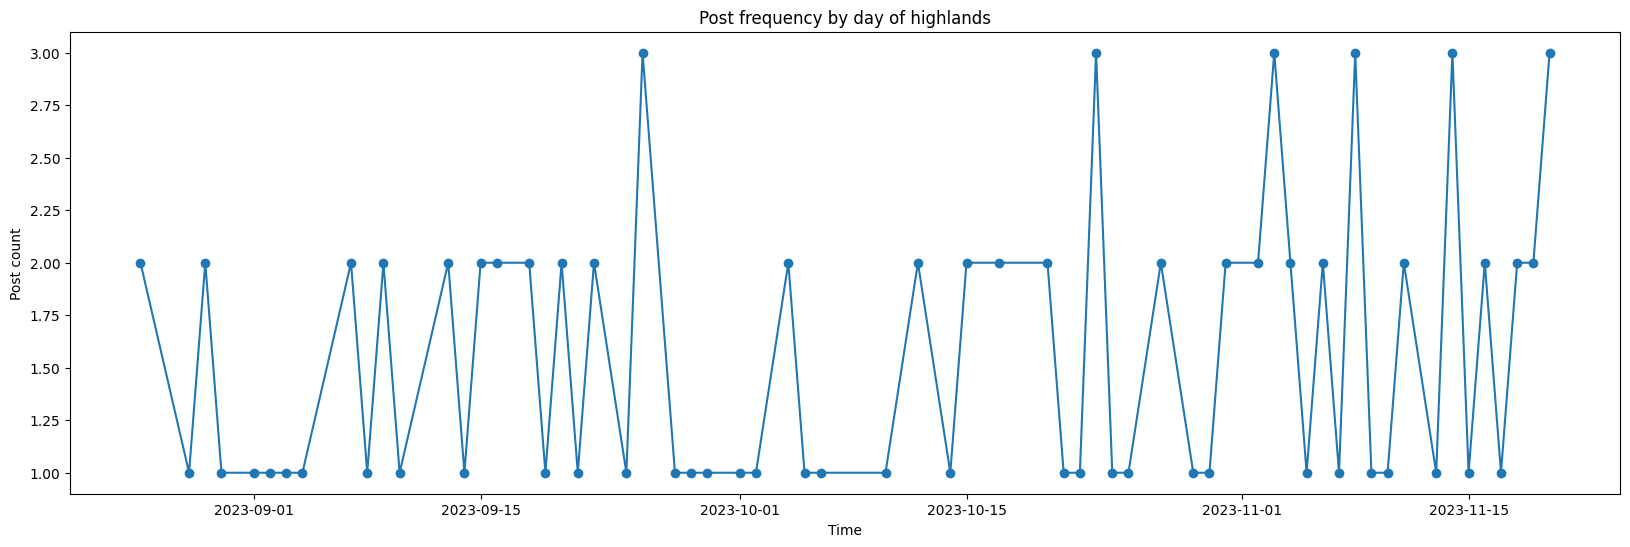

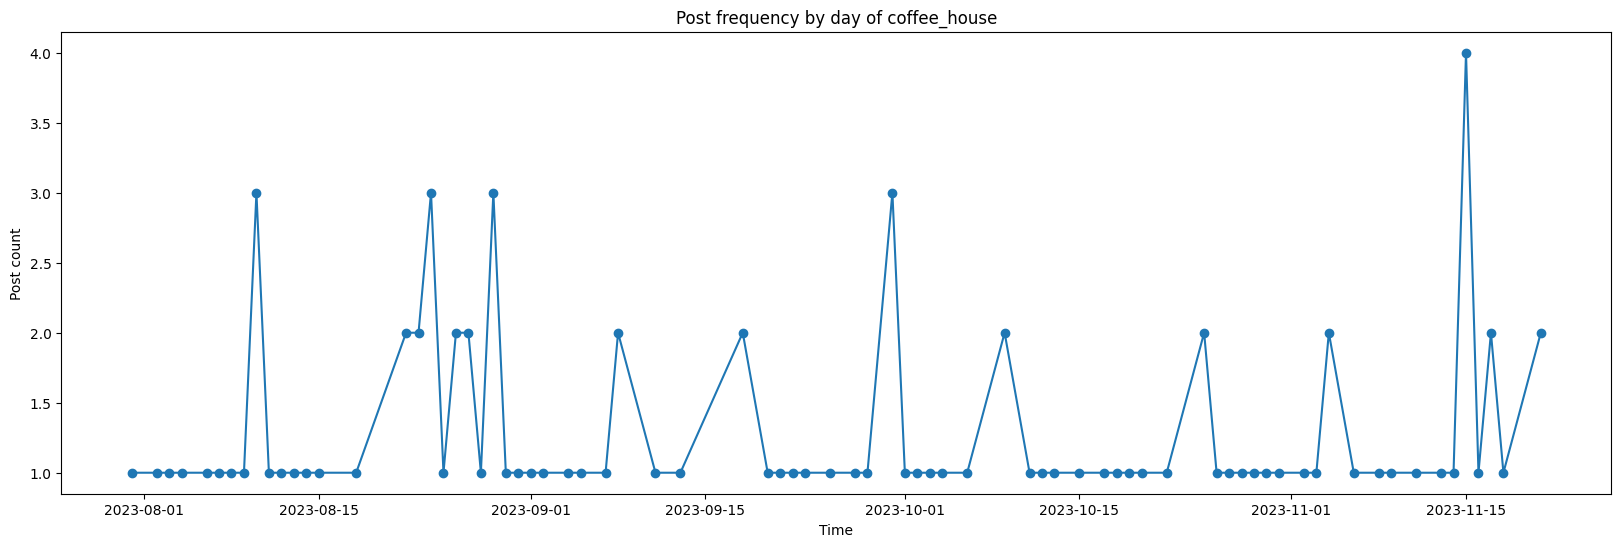

In [46]:
post_frequency_by_day(starbucks_df)
post_frequency_by_day(highlands_df)
post_frequency_by_day(coffee_house_df)

#### Tần suất đăng bài theo giờ

In [50]:
def post_frequency_by_hour(df):
    df['time'] = pd.to_datetime(df['time'])
    df['hour'] = df['time'].dt.hour
    post_frequency_df = df.groupby('hour')['post_id'].count().reset_index()
    post_frequency_df.columns = ['hour', 'post_count']
    plt.plot(post_frequency_df['hour'], post_frequency_df['post_count'], marker='o', linestyle='-', color='skyblue')
    plt.xlabel('Hour')
    plt.ylabel('Number of post')
    plt.title('Post frequency by hour of '+ df.name)
    plt.show()

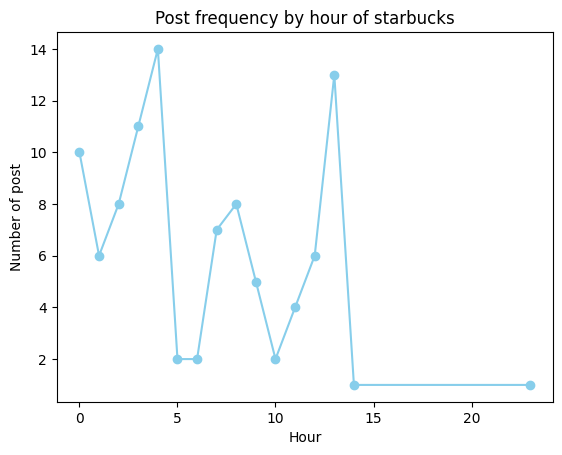

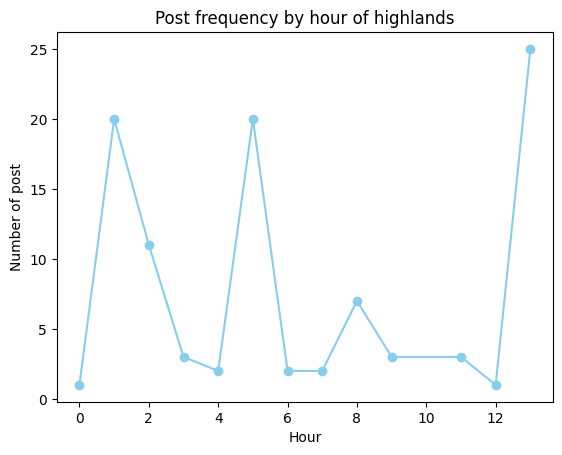

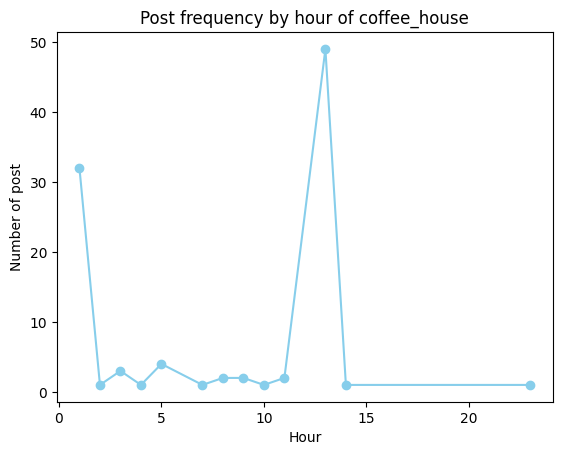

In [51]:
post_frequency_by_hour(starbucks_df)
post_frequency_by_hour(highlands_df)
post_frequency_by_hour(coffee_house_df)

### Xu hướng lượt tương tác theo ngày

#### a, Lượt reactions và comments theo ngày và sự tương quan giữa reactions và comments

In [96]:
def Reactions_days(df):
    fig = plt.subplots(figsize=(25,10))
    plt.plot(df['time'],df['reaction_count'],marker='o',color='skyblue', linestyle='-',label = 'Reactions')
    plt.xlabel('time')
    plt.ylabel('reactions_count')
    plt.title(df.name +' reactions')
    plt.legend()
    plt.show()
def Comments_days(df):
    fig = plt.subplots(figsize=(25,10))
    plt.plot(df['time'],df['comments'],marker='o', linestyle='-',color='skyblue',label = 'Comments')
    plt.xlabel('time')
    plt.ylabel('Comments_count')
    plt.title(df.name + ' comments')
    plt.legend()
    plt.show()
def Reactions_and_commnets_days(df):
    fig = plt.subplots(figsize=(25,10))
    plt.plot(df['time'],df['reaction_count'],marker='o',color='blue', linestyle='--',label = 'Reactions')
    plt.plot(df['time'],df['comments'],marker='o', linestyle='-',color='red',label = 'Comments')
    plt.xlabel('time')
    plt.ylabel('reactions and comments')
    plt.title(df.name +'reactions and comments')
    plt.legend()
    plt.show()

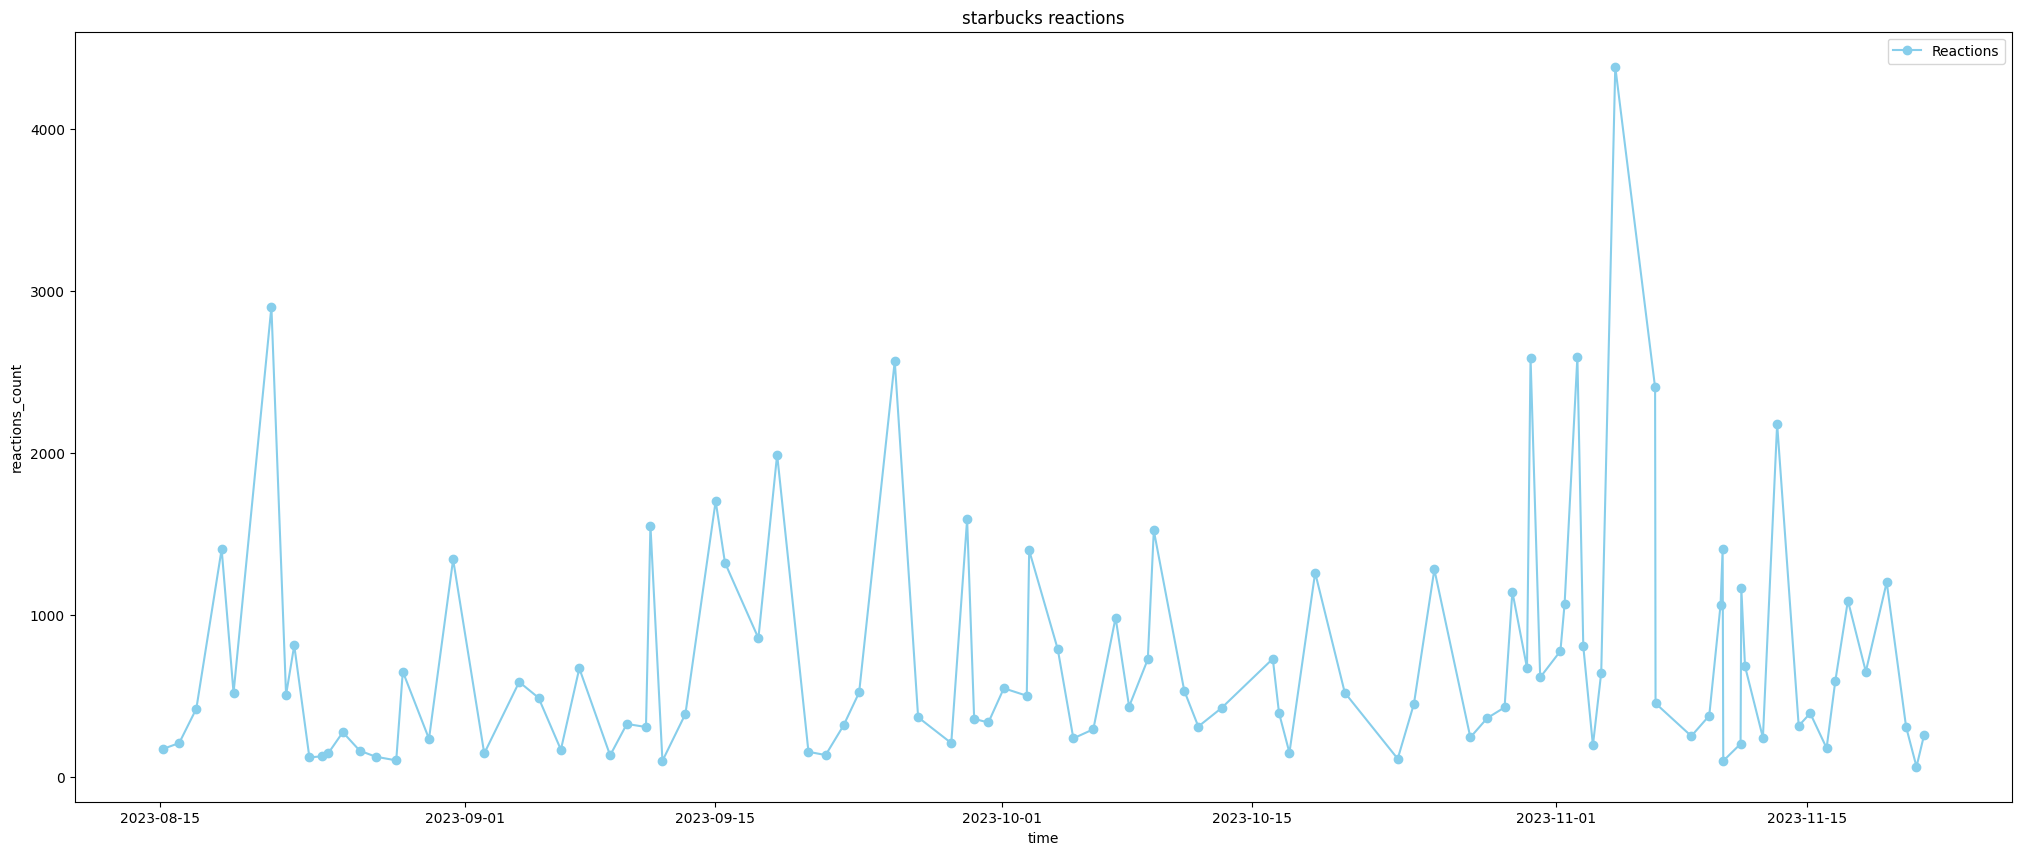

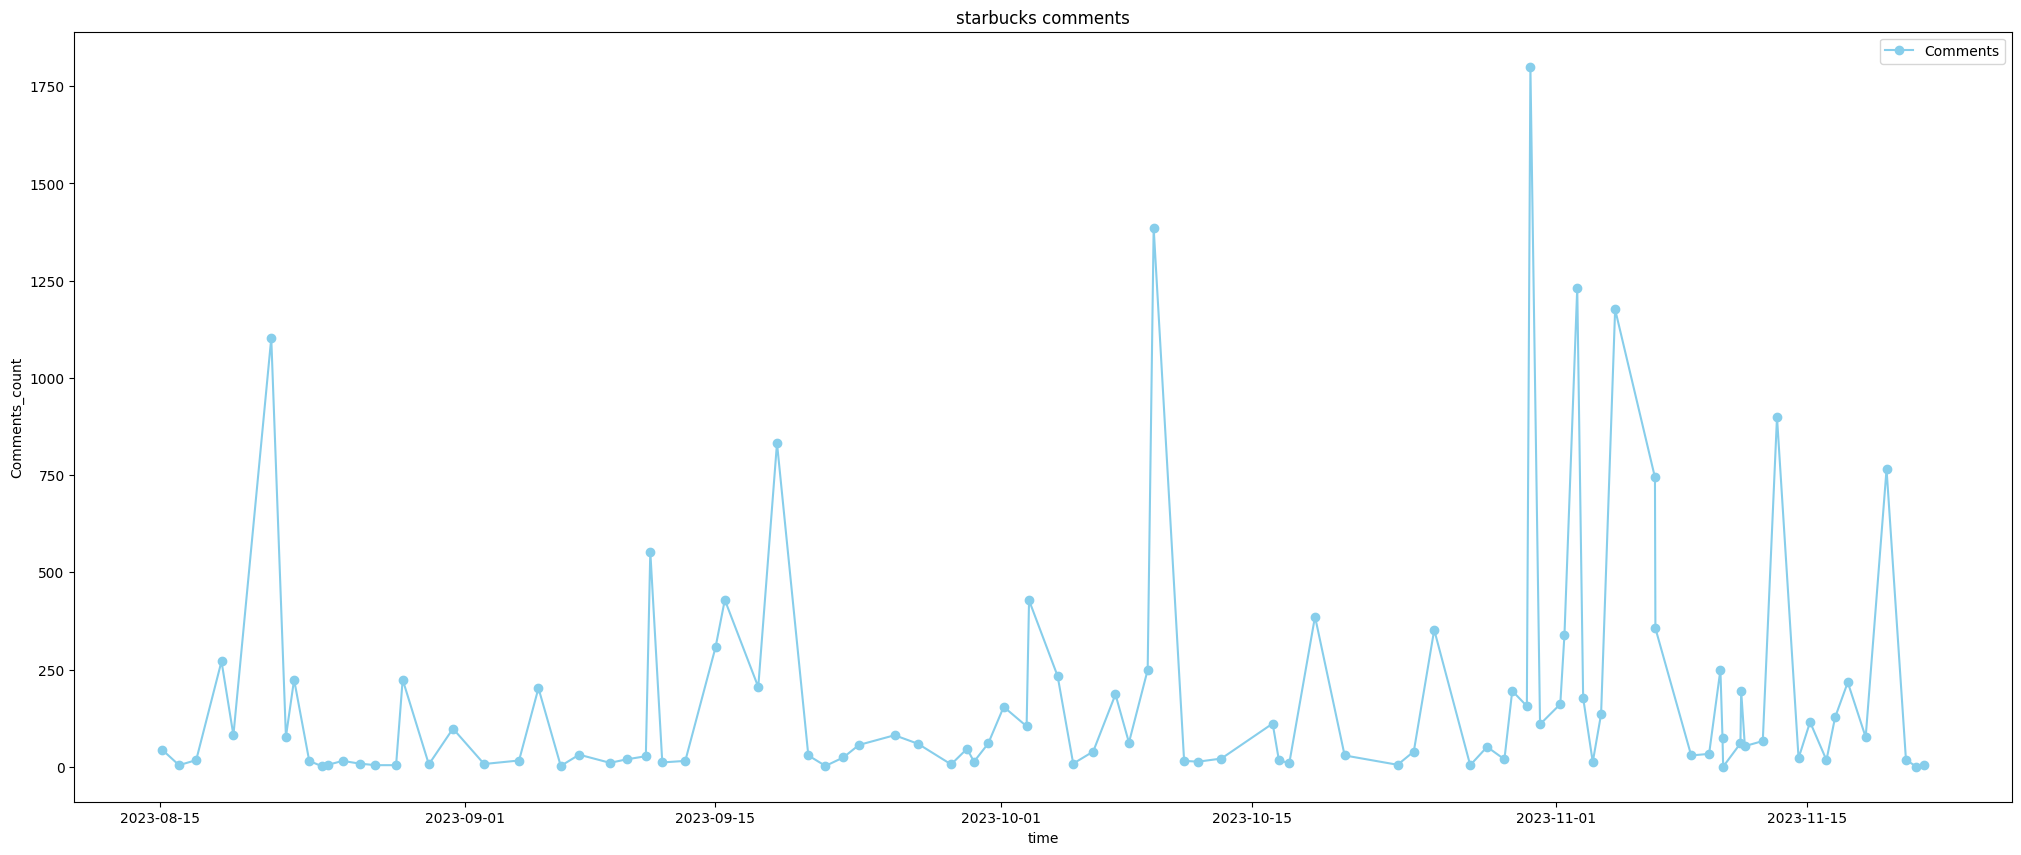

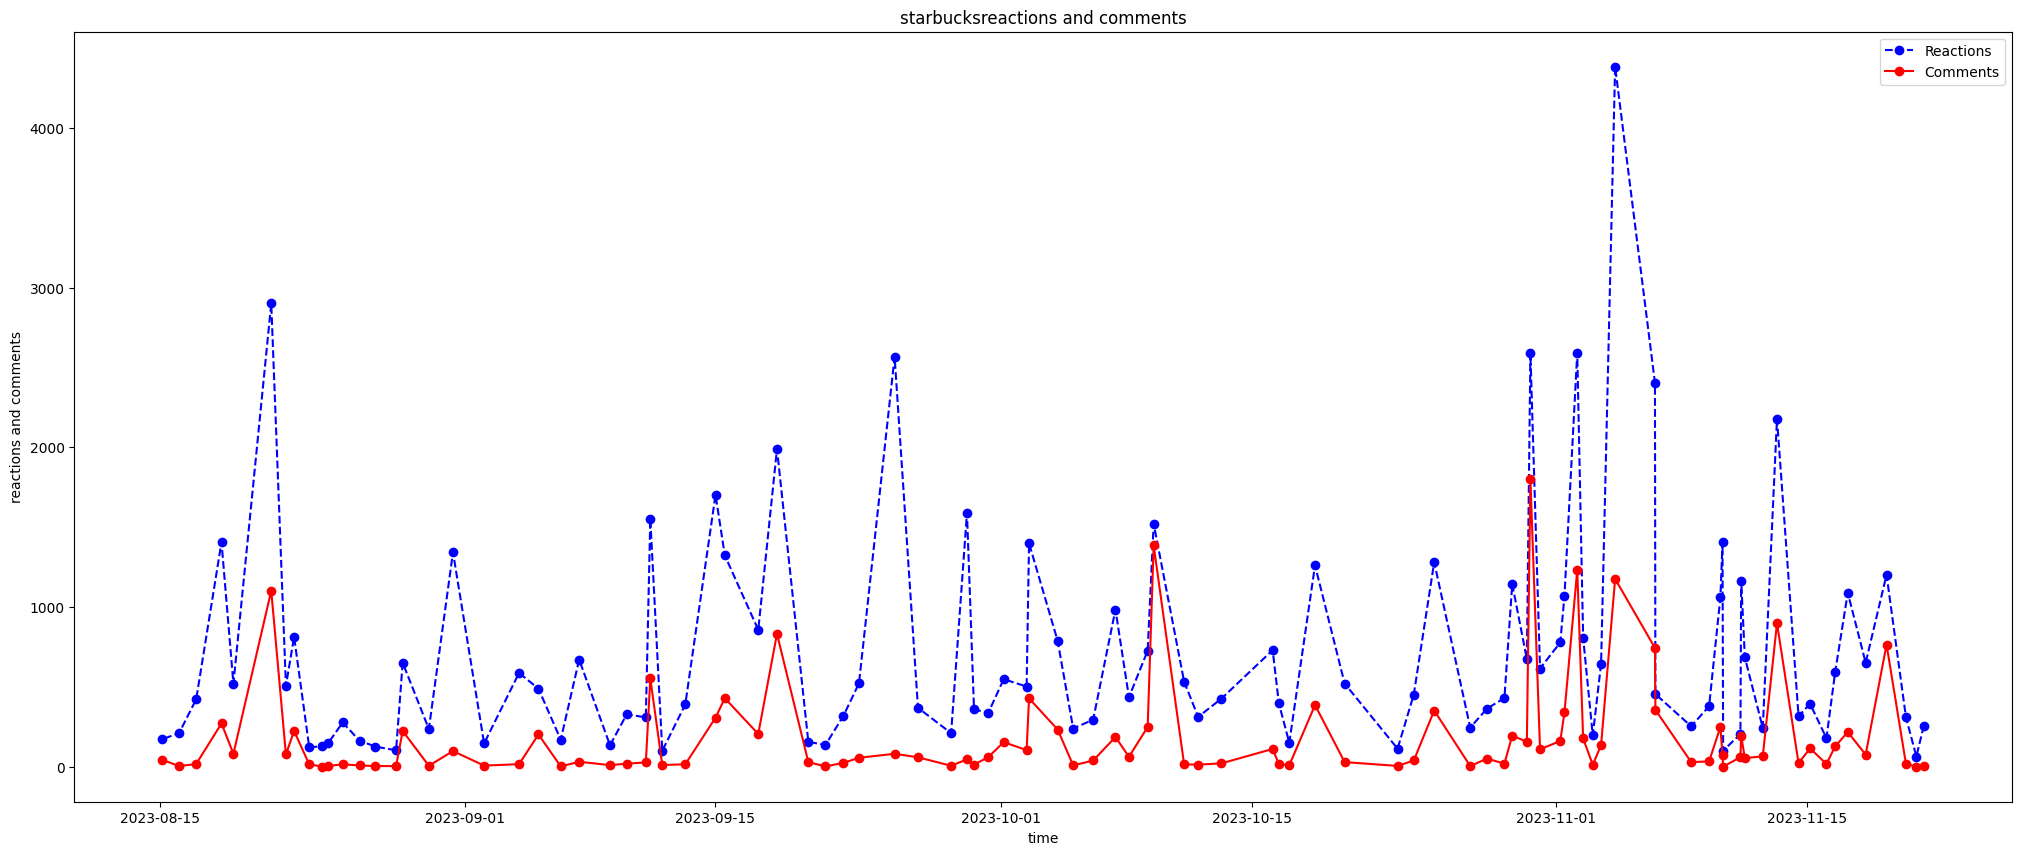

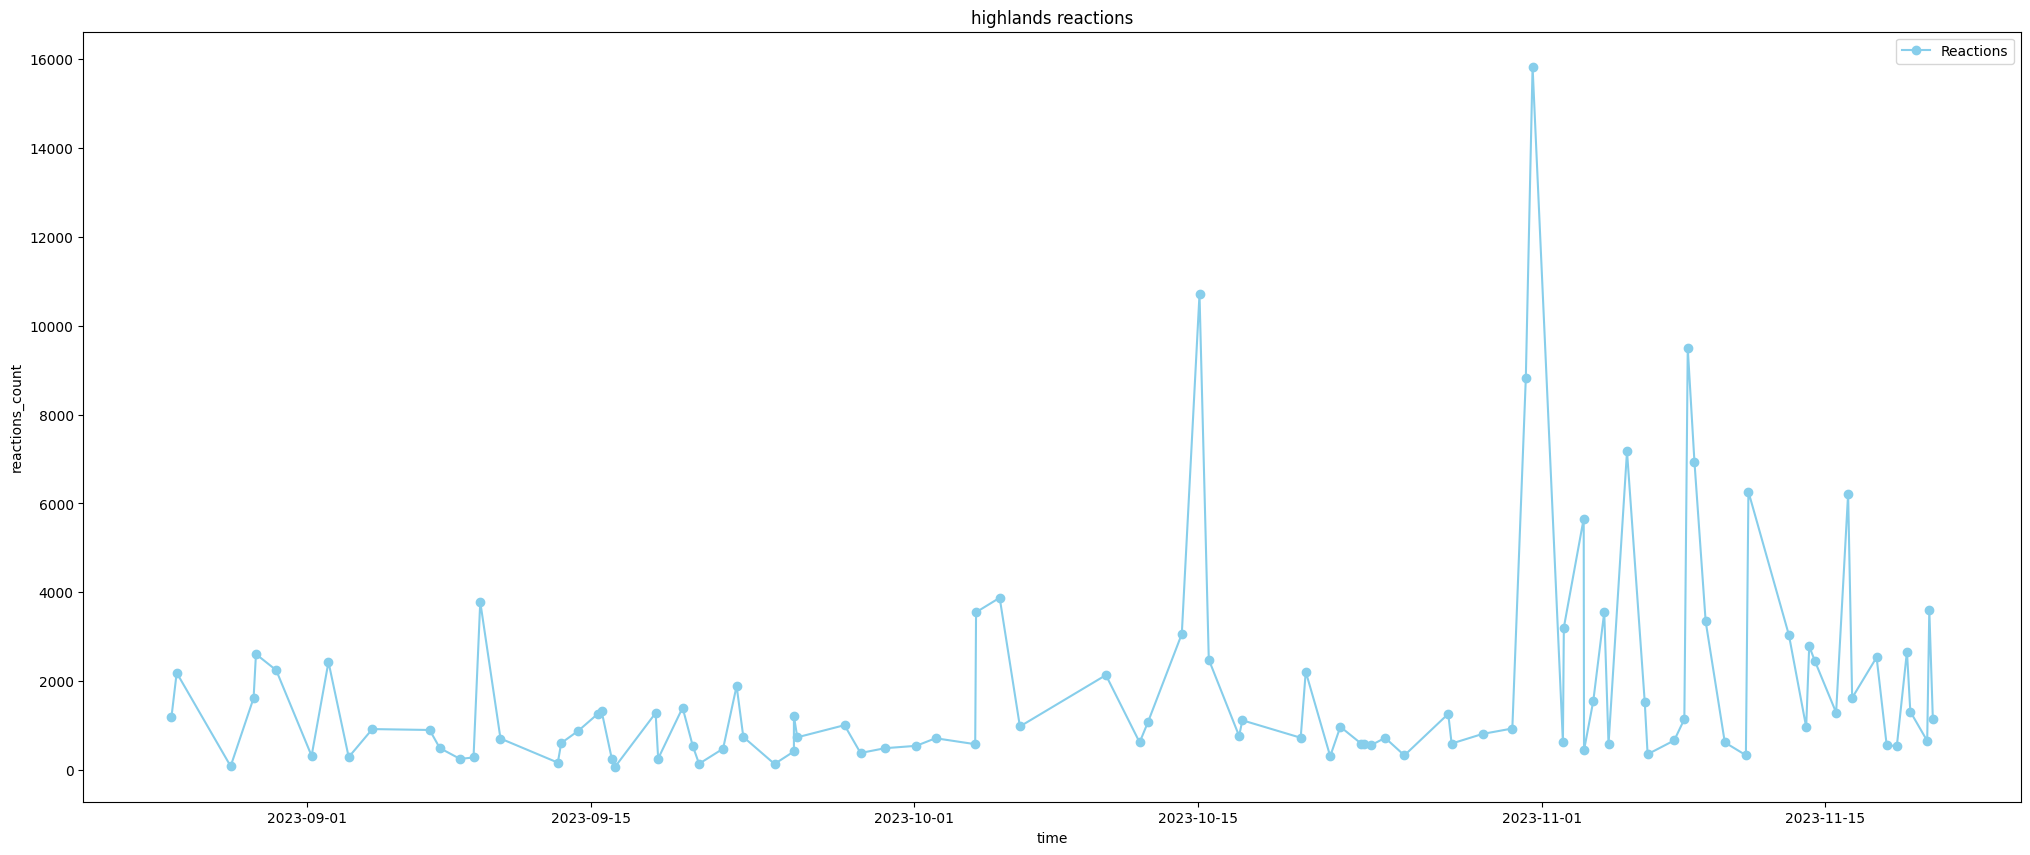

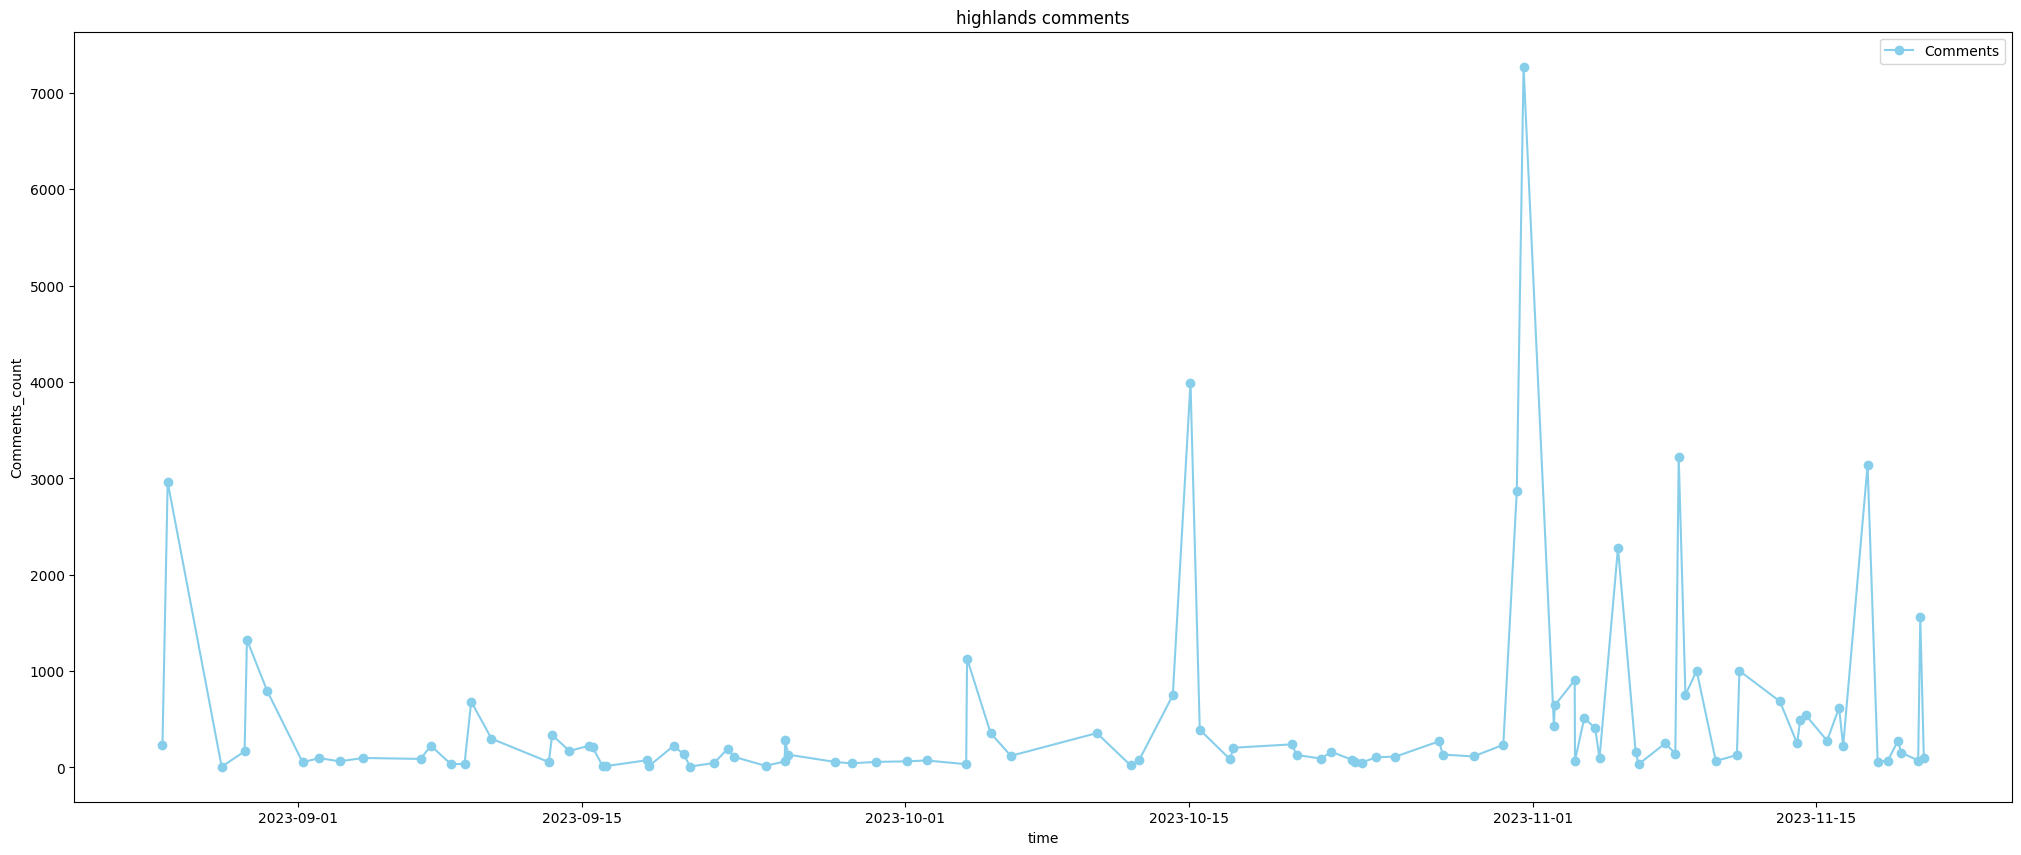

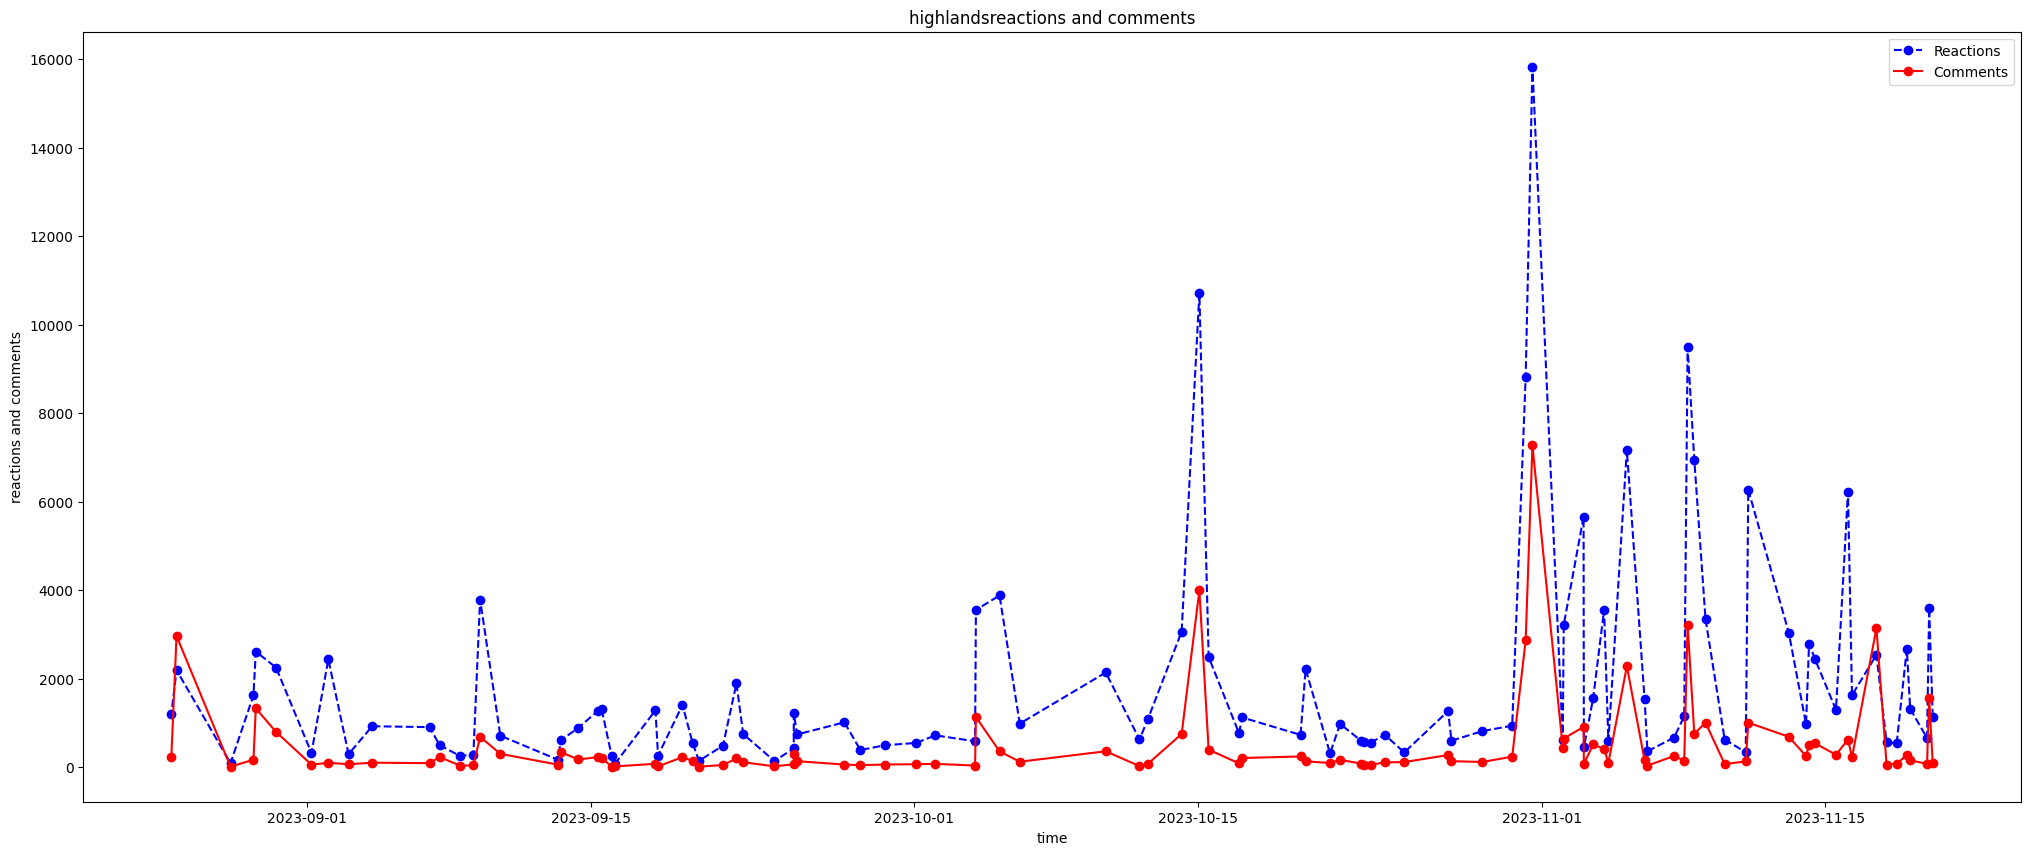

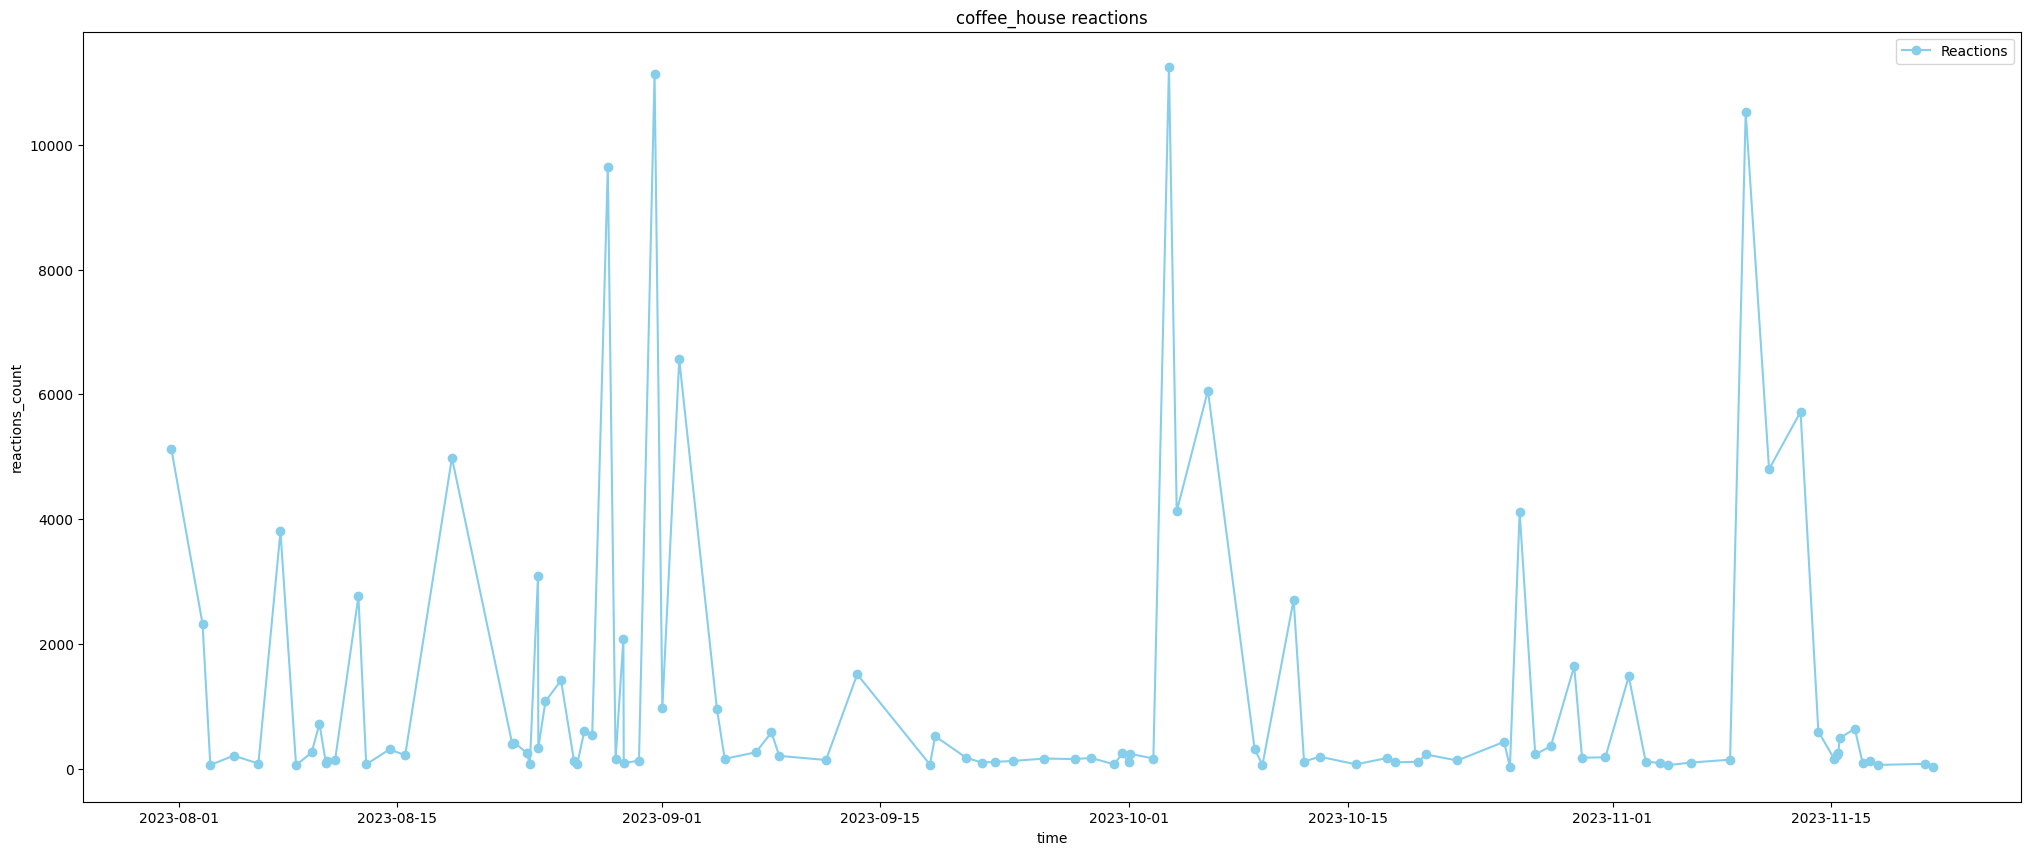

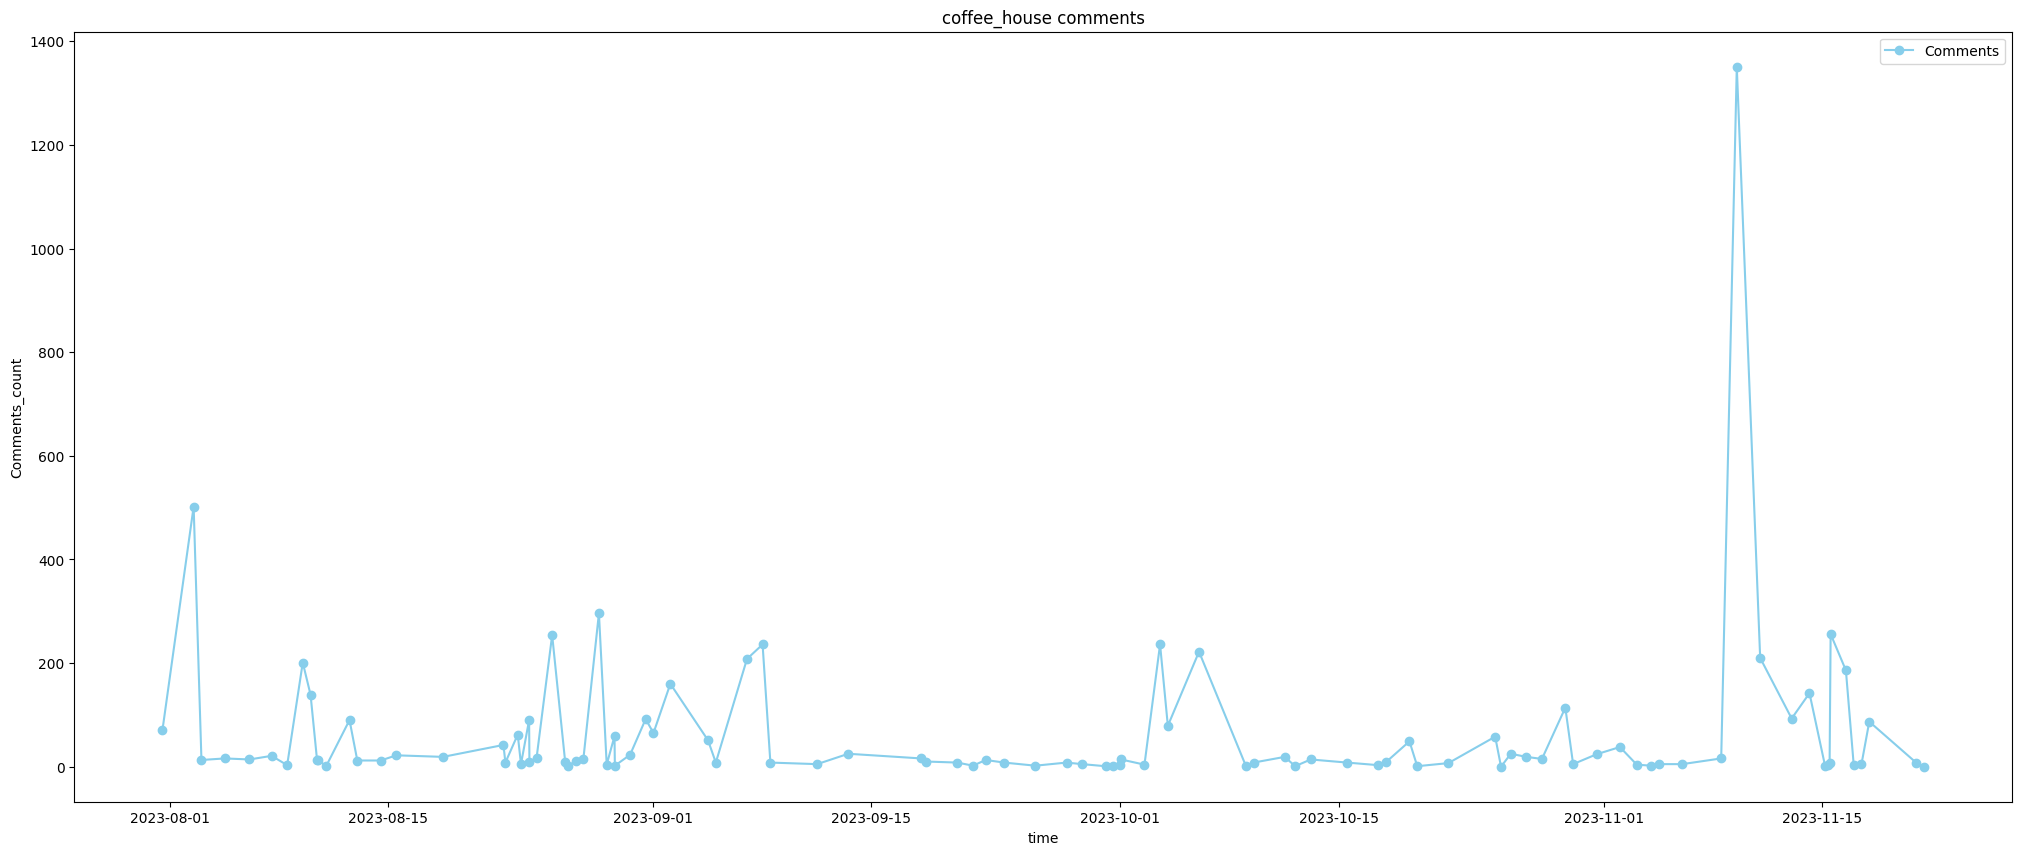

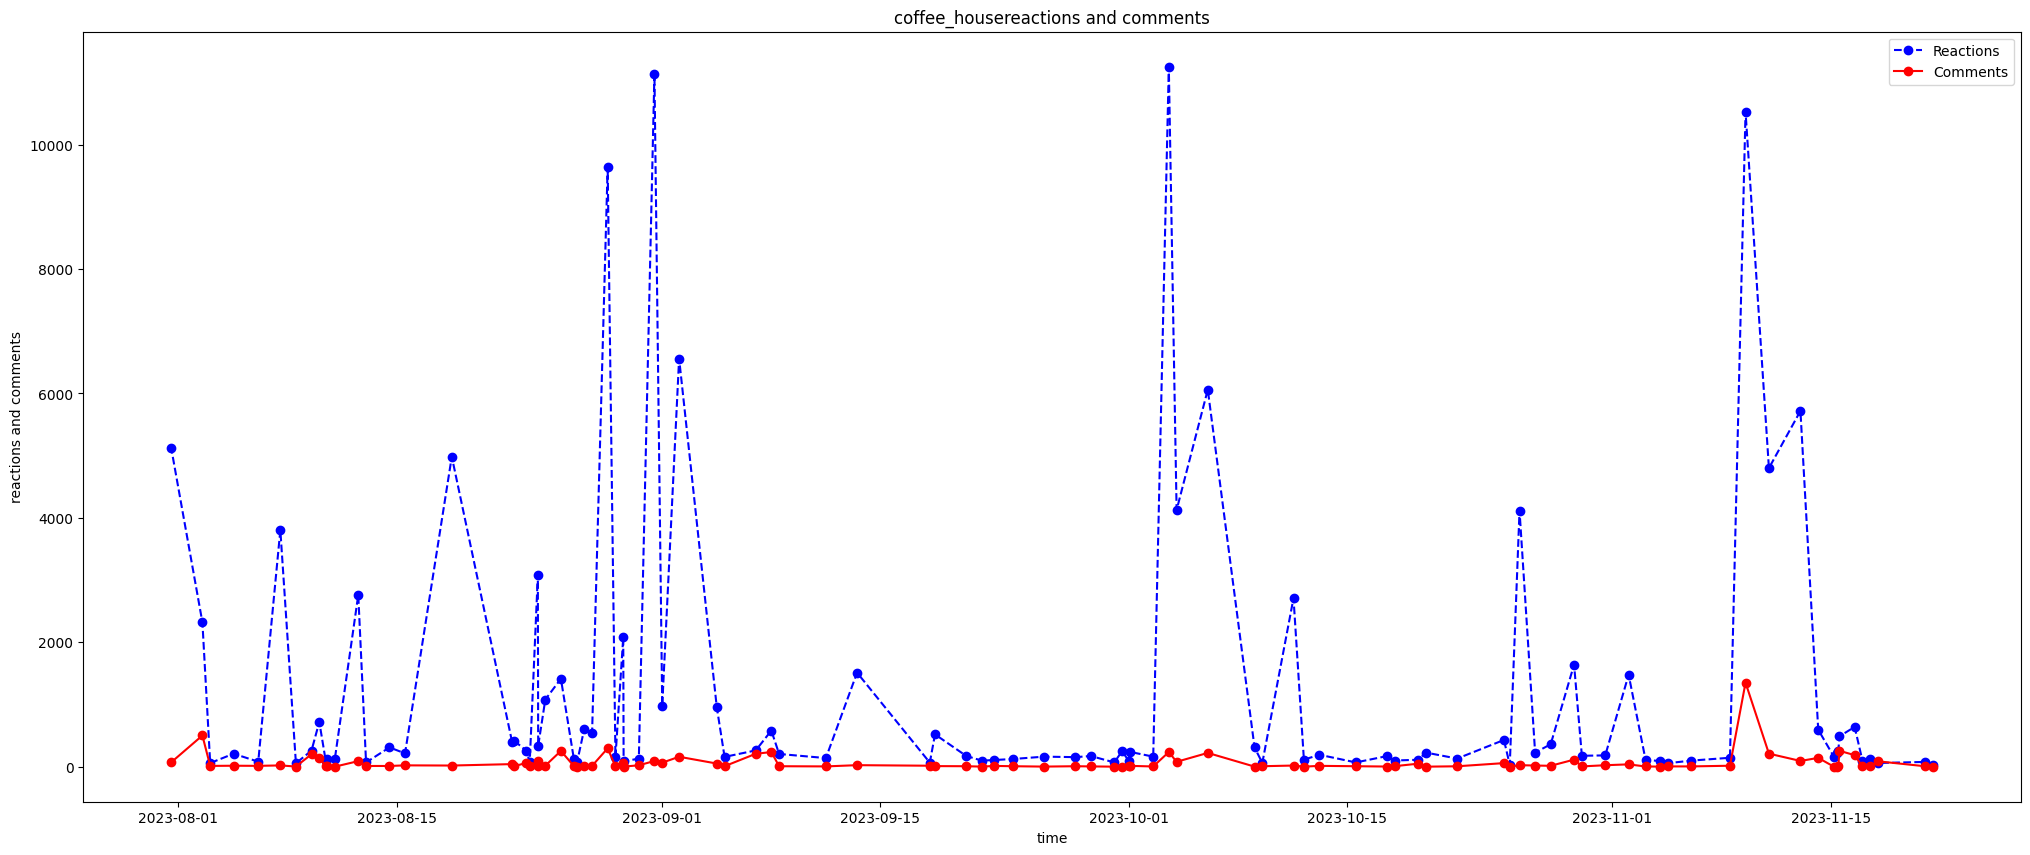

In [97]:
Reactions_days(starbucks_df)
Comments_days(starbucks_df)
Reactions_and_commnets_days(starbucks_df)
Reactions_days(highlands_df)
Comments_days(highlands_df)
Reactions_and_commnets_days(highlands_df)
Reactions_days(coffee_house_df)
Comments_days(coffee_house_df)
Reactions_and_commnets_days(coffee_house_df)
plt.show()

##### So sánh tương quan lượt Reactions và Commnets giữa 3 page

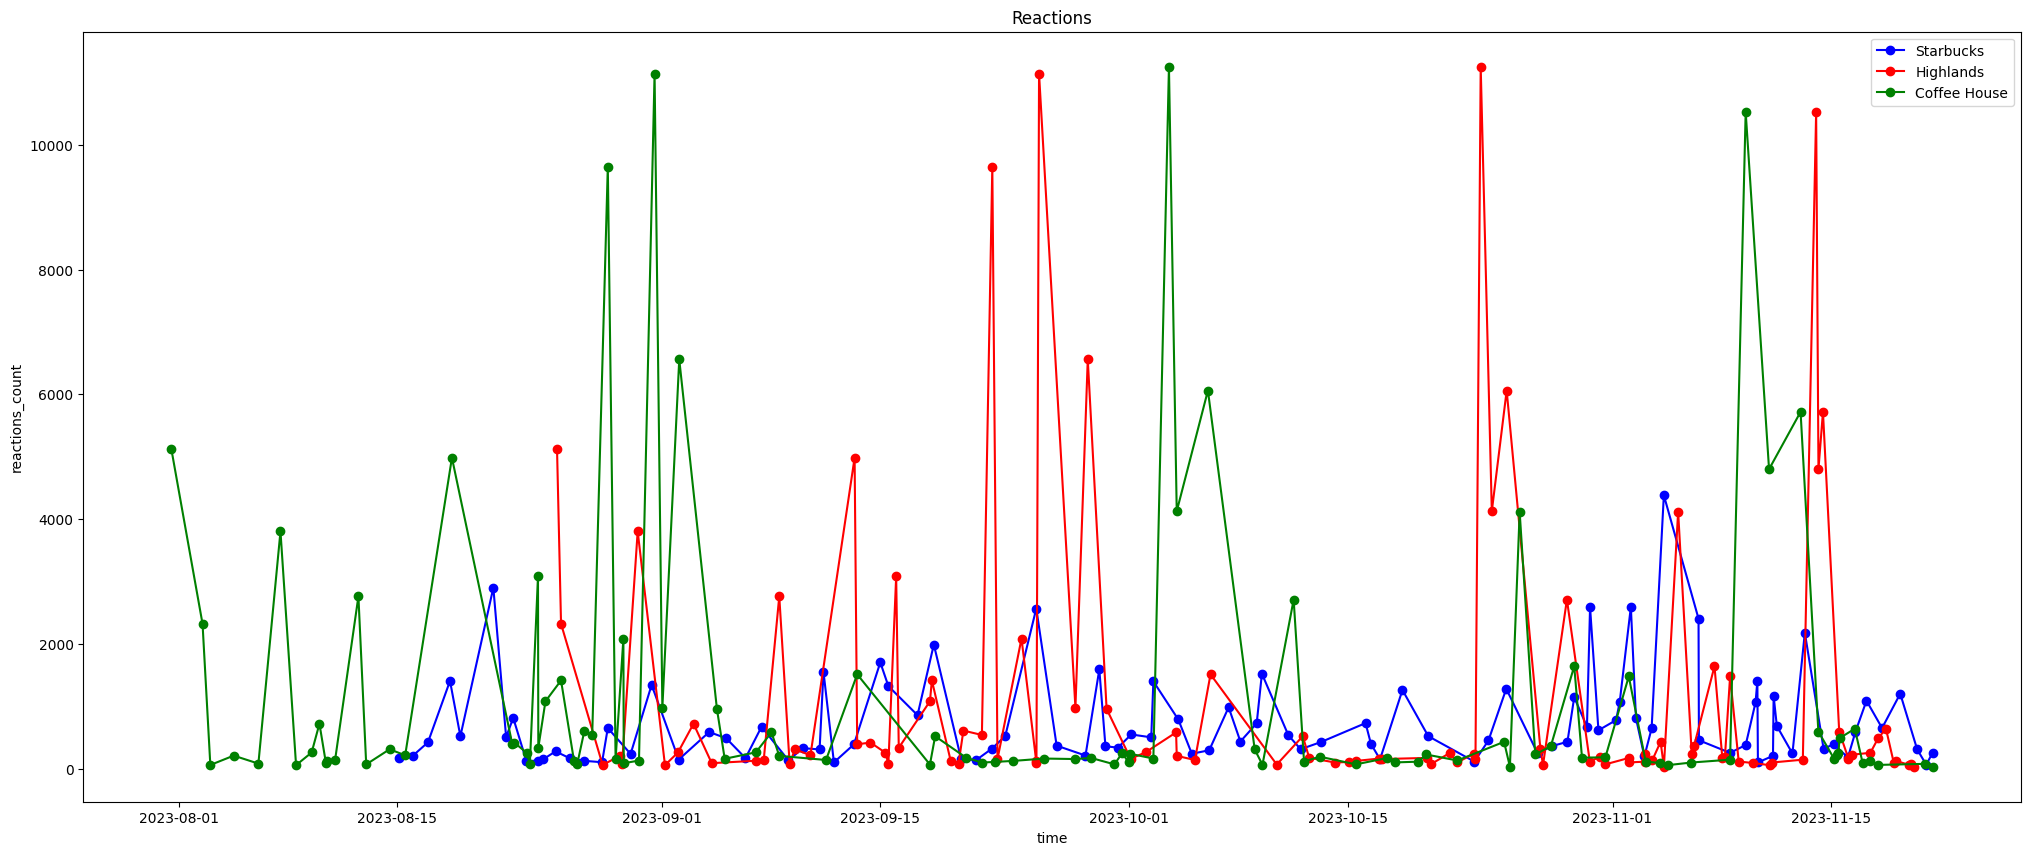

In [82]:
def Reactions__of_3_pages(df1,df2,df3):
    fig = plt.subplots(figsize=(25,10))
    plt.plot(df1['time'],df1['reaction_count'],marker='o',color='blue', linestyle='-',label = 'Starbucks')
    plt.plot(df2['time'],df3['reaction_count'],marker='o',color='red', linestyle='-',label = 'Highlands')
    plt.plot(df3['time'],df3['reaction_count'],marker='o',color='green', linestyle='-',label = 'Coffee House')
    plt.xlabel('time')
    plt.ylabel('reactions_count')
    plt.title('Reactions')
    plt.legend()
    plt.show()
Reactions__of_3_pages(starbucks_df,highlands_df,coffee_house_df)

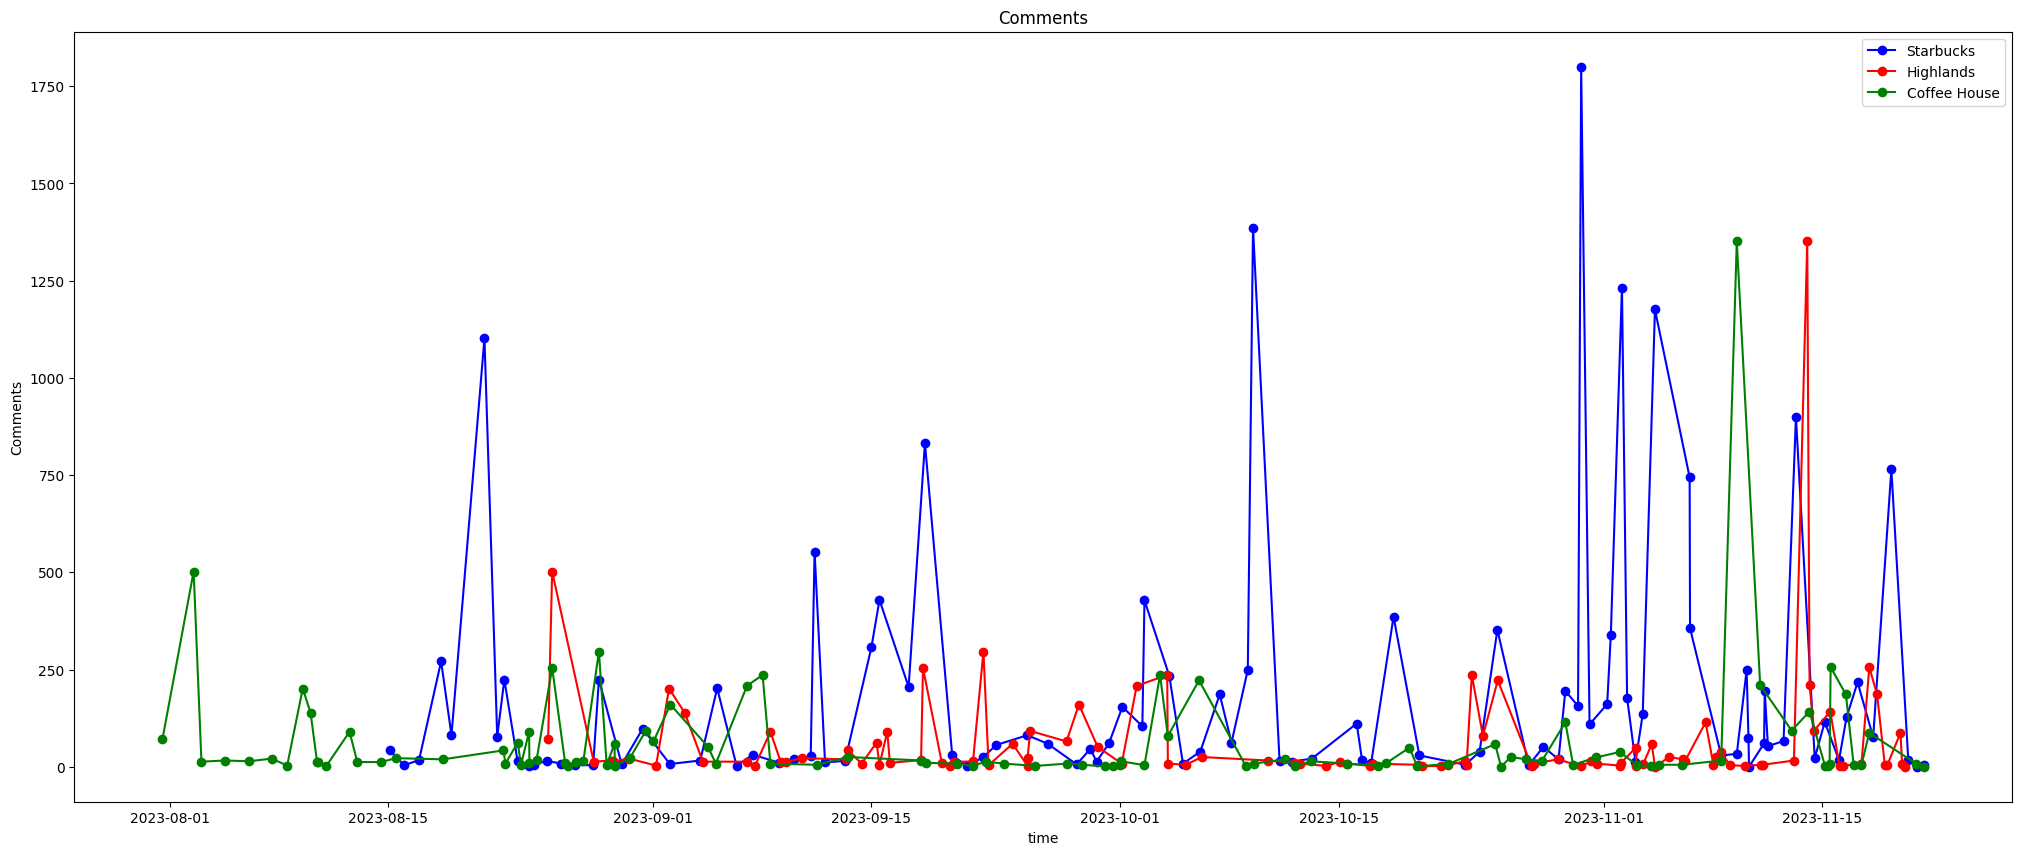

In [79]:
def Commnets__of_3_page(df1,df2,df3):
    fig = plt.subplots(figsize=(25,10))
    plt.plot(df1['time'],df1['comments'],marker='o',color='blue', linestyle='-',label = 'Starbucks')
    plt.plot(df2['time'],df3['comments'],marker='o',color='red', linestyle='-',label = 'Highlands')
    plt.plot(df3['time'],df3['comments'],marker='o',color='green', linestyle='-',label = 'Coffee House')
    plt.xlabel('time')
    plt.ylabel('Comments')
    plt.title('Comments')
    plt.legend()
    plt.show()
Commnets__of_3_page(starbucks_df,highlands_df,coffee_house_df)

#### b, Lượt tương tác theo thời điểm đăng bài

In [83]:
def hourly_stats(df):
    df['time'] = pd.to_datetime(df['time'])
    df['hour'] = df['time'].dt.hour
    hourly_stats_df = df.groupby('hour').agg({'reaction_count': 'sum', 'comments': 'sum'}).reset_index()
    print(hourly_stats_df)
    return hourly_stats_df

In [84]:
hourly_stats(starbucks_df)

    hour  reaction_count  comments
0      0            6902       596
1      1            3011       108
2      2            2277       285
3      3            4369       902
4      4           11300      3398
5      5             934       190
6      6             763        81
7      7            7956      1618
8      8            7274      1610
9      9            3729       898
10    10            3396      1103
11    11            3444      1342
12    12            7034      2845
13    13           10002      3658
14    14             590       127
15    23             312        13


,hour,reaction_count,comments
0,0,6902,596
1,1,3011,108
2,2,2277,285
3,3,4369,902
4,4,11300,3398
5,5,934,190
6,6,763,81
7,7,7956,1618
8,8,7274,1610
9,9,3729,898


In [53]:
hourly_stats_starbuck_df = hourly_stats(starbucks_df)

    hour  reaction_count  comments
0      0            6902       596
1      1            3011       108
2      2            2277       285
3      3            4369       902
4      4           11300      3398
5      5             934       190
6      6             763        81
7      7            7956      1618
8      8            7274      1610
9      9            3729       898
10    10            3396      1103
11    11            3444      1342
12    12            7034      2845
13    13           10002      3658
14    14             590       127
15    23             312        13


In [54]:
hourly_stats_highlands_df = hourly_stats(highlands_df)

    hour  reaction_count  comments
0      0             583        34
1      1           25794      4523
2      2           25142      6807
3      3           10443      2204
4      4            1698       257
5      5           53119     12693
6      6            1925       343
7      7            1724       194
8      8            7513       812
9      9            2321       500
10    11            6997      2478
11    12            2445       540
12    13           48831     18509


In [340]:
a

,hour,reaction_count,comments
0,0,6902,596
1,1,3011,108
2,2,2277,285
3,3,4369,902
4,4,11300,3398
5,5,934,190
6,6,763,81
7,7,7956,1618
8,8,7274,1610
9,9,3729,898


In [308]:
a = a.value_counts().sort_index()

In [290]:
starbucks_df['']

post_hour
0     10
1      6
2      8
3     11
4     14
5      2
6      2
7      7
8      8
9      5
10     2
11     4
12     6
13    13
14     1
23     1
dtype: int64

In [258]:
a = post_each_hour(starbucks_df)
b = post_each_hour(highlands_df)
c = post_each_hour(coffee_house_df)

In [276]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       16 non-null     int64
dtypes: int64(1)
memory usage: 620.0 bytes


In [267]:
b[0]

post_hour
0      1
1     20
2     11
3      3
4      2
5     20
6      2
7      2
8      7
9      3
11     3
12     1
13    25
Name: 0, dtype: int64

In [268]:
c[0]

post_hour
1     32
2      1
3      3
4      1
5      4
7      1
8      2
9      2
10     1
11     2
13    49
14     1
23     1
Name: 0, dtype: int64

In [324]:
df = pd.DataFrame({'post' : ['post1','post2','post3','post4','post5','post6','post7','post8','post9'],
        'comments':[2,4,1,4,5,6,4,1,5,],
        'reactions' : [4,2,4,1,5,1,12,8,10],
        'time':['2023-11-21 13:00:37','2023-11-21 02:58:53','2023-11-20 13:01:14','2023-11-19 11:00:24','2023-11-18 07:00:31','2023-11-17 07:00:18','2023-11-16 14:00:18','2023-11-16 02:25:17','2023-11-15 04:25:53'],
})

In [331]:
def hourly_stats(df):
    # Chuyển cột 'time' sang kiểu dữ liệu datetime
    df['time'] = pd.to_datetime(df['time'])
    
    # Tạo cột mới 'hour' để lấy giờ từ cột 'time'
    df['hour'] = df['time'].dt.hour
    
    # Thống kê lượng reactions và comments theo giờ
    hourly_stats_df = df.groupby('hour').agg({'reaction_count': 'sum', 'comments': 'sum'}).reset_index()
    
    return hourly_stats_df

In [329]:
starbucks_df[['comments','reaction_count','time']]

,comments,reaction_count,time
0,5,257,2023-11-21 13:00:37
1,0,64,2023-11-21 02:58:53
2,18,310,2023-11-20 13:01:14
3,765,1202,2023-11-19 11:00:24
4,76,651,2023-11-18 07:00:31
...,...,...,...
95,81,520,2023-08-19 02:00:02
96,271,1406,2023-08-18 10:01:59
97,17,422,2023-08-17 00:05:03
98,4,210,2023-08-16 01:06:03


In [332]:
a = hourly_stats(starbucks_df[['comments','reaction_count','time']])

C:\Users\NAME\AppData\Local\Temp\ipykernel_2848\823647624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])
C:\Users\NAME\AppData\Local\Temp\ipykernel_2848\823647624.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['time'].dt.hour


In [333]:
a

,hour,reaction_count,comments
0,0,6902,596
1,1,3011,108
2,2,2277,285
3,3,4369,902
4,4,11300,3398
5,5,934,190
6,6,763,81
7,7,7956,1618
8,8,7274,1610
9,9,3729,898


In [237]:
post_each_hour_df

,starbucks,highlands_df
0,post_hour 0 10 dtype: int64,post_hour 0 1 dtype: int64


In [98]:
def reactions_trend_hour(df):
    fig = plt.subplots(figsize=(15,5))
    plt.plot(df.index,df['reaction_count'],marker='o',label = 'Reactions')
    plt.xlabel('time')
    plt.ylabel('reactions_count')
    plt.title(df.name +' reactions')
    plt.legend()
    plt.show()

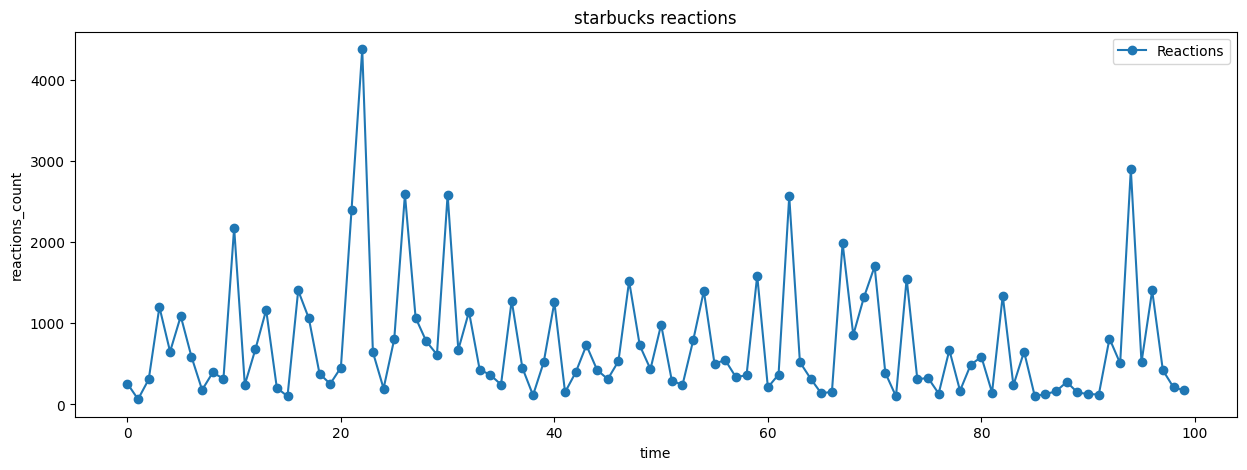

In [99]:
reactions_trend_hour(starbucks_df)